# Julia Tutorial of Data Analysis in Oceanography

* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming language similar to Julia are Matlab and Python
   * Unlike Python, Julia is build from the ground for techical computing
   * Unlike Matlab, julia is free and open-source software

* Note that Julia and IJulia is already installed on the machines of the computer room
* If you want to install Julia on your laptop later on, here are some instructions

## Instructions for installing Julia on your Laptop

* Go to http://julialang.org/downloads/
* Install also a text editor with support for Julia (like atom, notepad++, emacs...)
* Julia modules for this lecture can be installed by the following commands:

```julia
Pkg.add("DataArrays")
Pkg.add("NCDatasets")
Pkg.add("PyPlot")
Pkg.add("PyCall")
```

### Optionally

* Install `IJulia` which also installs Jupyter http://jupyter.org/


* [Keyboard short cuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/)
* General documentation of [Jupyter Notebooks](http://jupyter-notebook.readthedocs.io)



# Getting started


* Start the computer and boot into Debian
* Open a web browser and log in to the internet
* Download the zip file at http://tinyurl.com/julia-tutorial
* Uncompress the zip file (remember the location of the folder `JuliaTutorial-master`)

* Download and decompress the file at http://gher-diva.phys.ulg.ac.be/MatlabOctaveTutorial/data/WesternMedSST.nc.gz and place the uncompressed file in the directory `JuliaTutorial-master`

* Open a terminal (Application -> Utilities -> Terminal). This is how the terminal icon looks like: ![icon](https://cdn.rawgit.com/Alexander-Barth/JuliaTutorial/master/img/gnome-terminal.svg)
* Go to the directory `JuliaTutorial-master`, for example by using the command
```bash
cd Downloads/JuliaTutorial-master
```
(if `JuliaTutorial-master` was extracted in the `Downloads` folder.)

* Launch Jupyter from the terminal with the command:

```bash
jupyter notebook Julia-starter.ipynb
``` 


# First steps in Julia

## Numbers

* Use a dot (.) as decimal separator (e.g. 3.14 and not 3,14)
* You can use the scientific notation $a \times 10^{-b}$ using the e-notation. (e.g. $3 \times10^{-7}$ becomes 3e-7) 
* Use Julia as a calculator:

In [85]:
1 + 3 * 4/2

7.0

* The usual operator precedence applies


## Useful constants

Various constants are also pre-defined: π (pi), e (Euler's number), im (the imaginary number), Inf (Infinity, result from e.g. 1/0) and NaN (Not a Number - result from e.g. 0/0)

NaN is very special: 
* NaN plus any number is NaN

In [86]:
NaN + 1

NaN

* NaN is not equal to itself

In [88]:
NaN == NaN

false

In [89]:
isnan(NaN)

true

## Variables

* Numbers (and any other data type) can be put into variables
* The value of a variable is referenced by its name
* A variable name can be composed by letters (a-z and A-Z, including greek letters, accents,...), numbers (0-9) and underscore (_). The first character cannot be a number.

* Example:

In [1]:
temp = 21

21

Any expression can now include the variable `temp`:

In [3]:
2 * temp


42

# Markdown

This is an explanation
* item one
* item two
   * sub item one
   * sub item two
$$ c^2 = a^2 + b^2 $$ 
   

* The variable `temp` has now the value 21. The value of the variable can be changed later on.
* An assignment without a final semicolon echos its value to the screen
* Careful: the value of constants can be overwritten. The following is allowed but not encouraged:
    	
```julia        
    pi = 3; # do not do this
```

* The command `whos()` lists the currently defined variables and their size. 

## Strings

* Delimited by double quotes
    	

In [95]:
s = "Hello world"
print(s)

Hello world

* How to use a double quote in a string? -> place a backslash in front:

In [96]:
s = "The letter \"A\" is the first letter of the alphabet."
print(s)

The letter "A" is the first letter of the alphabet.

## Vectors and matrices

* Vectors are list of numbers. The column vector $\left(\begin{array}{c}1 \\ 2 \\ 3 \end{array} \right)$ is represented by:

In [97]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

* Matrices are tables of numbers. Rows are separated by a semicolon. The matrix 
$\left(\begin{array}{cc}1 & 2 \\ 3 & 4 \end{array} \right)$ is represented by:

In [99]:
[1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

The determinant  can be for example computed with `det`:

In [100]:
det([1 2; 3 4])

-2.0

* There are no "row vectors", just matrices with one row:

In [101]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [102]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

### Ranges

* Consecutive elements can be written as

    first:step:last
    
* or simply, if the step is 1,
    	
    first:last
    
* Use the function `collect` or `[first:step:last;]` to transform a range into a vector:
   
Instead of typing this:  

In [103]:
[1,2,3,4,5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

One could simply write this as:

In [104]:
1:5

1:5

Or the full list:

In [105]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

Now if we need only every second element:

In [106]:
1:2:6

1:2:5

In [107]:
collect(1:2:6)

3-element Array{Int64,1}:
 1
 3
 5

Note that 6 is not part of the previous range.

## Indexing

* Consider the following vector:

In [109]:
a = [2,5,7,19,2]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

* Individual elements of a vector or matrix can be addressed by their index
* The second element of a vector `a` is for example `a[2]`

In [110]:
a[2]

5

In [111]:
length(a)

5

In [112]:
a[length(a)]

2

* The special word `end` refers to the last index.

In [113]:
a[end]

2

* One can also use a list of indexes to extract a part of the vector

In [114]:
a[[2,3,4]]

3-element Array{Int64,1}:
  5
  7
 19

In [115]:
a[[2,3,4]]

3-element Array{Int64,1}:
  5
  7
 19

* Or simply:

In [116]:
a[2:4]

3-element Array{Int64,1}:
  5
  7
 19

* The symbol colon : is a short-hand for 1:end

In [117]:
a[1:end]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

In [118]:
a[:]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

## Matrix indexing

* For matrices, two indices are used.
* The element at the second row and the first column of a matrix A is for example A[2,1]

In [119]:
A = [1 2; 3 4]


2×2 Array{Int64,2}:
 1  2
 3  4

In [120]:
A[2,1]

3

In [121]:
A[:,2]

2-element Array{Int64,1}:
 2
 4

In [122]:
A[4]

4

  
    
* If a matrix is indexed with only one subscript, the matrix is treaded as a vector where all columns are concatenated

* Julia supports also higher-dimensional arrays and indexing works similarily.



# Operators

* Scalar and matrix operations: + sum, - difference, * multiplication, / division
* Element-wise matrix operations: .* multiply element-wise, ./ divide element-wise 

## Comparison operators

 * equal (==) and different (!=)
 
 

In [123]:
2 == 1

false

In [124]:
9 == 3*3

true

In [125]:
[1 2 3] == [1 3 2]

false

In [126]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 true  false  false

* Be aware of the limited precision of floating point numbers


In [127]:
2.0000000000000001 == 2

true

 * element-wise equal (.==), element-wise different (.!=)

In [128]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 true  false  false

* comparision between numbers: <, >, <= (≤), => (≥)

In [129]:
30 > 25

true

* element-wise comparision between vector and matrices: .<, .>, .<= (.≤), .=> (.≥)

In [130]:
[1,2,3] .> 2

3-element BitArray{1}:
 false
 false
  true

In [131]:
[1,2,3] .> [3,1,2]

3-element BitArray{1}:
 false
  true
  true

* logical "and" (&&) logical "or" (||) (with short-circuit evaluation)

In [132]:
temperature = 30;
precipitation = 10;

if temperature > 25 && precipitation == 0
    print("go outside!")
end

* logical element-wise "and" (.&) logical element-wise "or" (.|)

* The results of such operators can also be used to index an array
    
* For example return all elements in the variable T which are greater than 10 but less than 20.
    

In [133]:
T = [27,17,20,26,32]
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

In [134]:
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

In [135]:
T .< 30

5-element BitArray{1}:
  true
  true
  true
  true
 false

In [136]:
T = [27,17,20,26,32]
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

* The function `find(condition)` returns the indexes of all elements where the condition is true.

In [137]:
find(20 .< T .& T .< 30)

2-element Array{Int64,1}:
 1
 4

* false is zero and true is 1. For instance to count the number of elements in the vector T which are larger than 20 one can use sum(T .> 20).

In [138]:
sum([1,2,3])

6

In [139]:
sum([1,0,1])

2

In [140]:
sum(T .> 20)

3

# Useful functions

* sin, cos, tan: trigonometric functions
* asin, acos, atan: inverse trigonometric functions
* log, log2, log10: natural, base 2 and base 10 logarithms: 
* exp: exponentiation
* abs: absolute value
* sqrt: square root
* mean: mean
* median: median
* std: standard deviation
* var: variance
* mod: modulo (useful to manipulate e.g. the longitude)
* isnan: Check if variable is NaN. Note that NaN == NaN is false!
* inv: inverse of a matrix
* sum: sum of all elements
* prod: product of all elements
* maximum,minimum: maximum,minimum value in an array
* max,min: maximum,minimum value of all arguments

These function can also operate of a given dimension: sum(array,dimension)

Find out more of these function by typing ? followed by the function name. 

In [141]:
?open

search: open isopen module_parent CompositeException operm Operators copper



```
open(filename::AbstractString, [read::Bool, write::Bool, create::Bool, truncate::Bool, append::Bool]) -> IOStream
```

Open a file in a mode specified by five boolean arguments. The default is to open files for reading only. Returns a stream for accessing the file.

```
open(filename::AbstractString, [mode::AbstractString]) -> IOStream
```

Alternate syntax for open, where a string-based mode specifier is used instead of the five booleans. The values of `mode` correspond to those from `fopen(3)` or Perl `open`, and are equivalent to setting the following boolean groups:

| Mode | Description                   |
|:---- |:----------------------------- |
| r    | read                          |
| r+   | read, write                   |
| w    | write, create, truncate       |
| w+   | read, write, create, truncate |
| a    | write, create, append         |
| a+   | read, write, create, append   |

```
open(f::Function, args...)
```

Apply the function `f` to the result of `open(args...)` and close the resulting file descriptor upon completion.

**Example**: `open(readstring, "file.txt")`

```
open(command, mode::AbstractString="r", stdio=DevNull)
```

Start running `command` asynchronously, and return a tuple `(stream,process)`.  If `mode` is `"r"`, then `stream` reads from the process's standard output and `stdio` optionally specifies the process's standard input stream.  If `mode` is `"w"`, then `stream` writes to the process's standard input and `stdio` optionally specifies the process's standard output stream.

```
open(f::Function, command, mode::AbstractString="r", stdio=DevNull)
```

Similar to `open(command, mode, stdio)`, but calls `f(stream)` on the resulting read or write stream, then closes the stream and waits for the process to complete.  Returns the value returned by `f`.


In [142]:
apropos("mean")

Base.reduce
Core.String
Base.std
Base.stdm
Base.varm
Base.Slice
Base.var
Base.isbits
Base.middle
Base.mean!
Base.:∘
Base.mean
Base.median
Base.null_safe_op
Base.iteratorsize
Base.iteratoreltype
Base.isleaftype
Base.isequal
Base.Condition
Base.Threads.atomic_cas!
Base.Random.randn!
Base.Random.randn
Base.Test.test_expr!
Base.LinAlg.sqrtm
Base.LinAlg.linreg
Base.LinAlg.LAPACK.gesvx!
Base.DFT.plan_fft
Base.DFT.plan_irfft
Base.DFT.FFTW.plan_idct
Base.DFT.FFTW.plan_dct
Base.LibGit2.clone
Base.Profile.fetch
Base.SparseArrays.sprand
Compat
IJulia.set_cur_msg
PyCall.pystealref!
FixedPointNumbers
ColorTypes.Colorant
ColorTypes.XYZ
ColorTypes.TransparentColor
Colors
Colors.weighted_color_mean


In [143]:
?mean

search: mean mean! median median! RemoteChannel SegmentationFault macroexpand



```
mean(f::Function, v)
```

Apply the function `f` to each element of `v` and take the mean.

```jldoctest
julia> mean(√, [1, 2, 3])
1.3820881233139908

julia> mean([√1, √2, √3])
1.3820881233139908
```

```
mean(v[, region])
```

Compute the mean of whole array `v`, or optionally along the dimensions in `region`.

!!! note
    Julia does not ignore `NaN` values in the computation. For applications requiring the handling of missing data, the `DataArrays.jl` package is recommended.



# The file system

* On every current operating system, files are organized in a tree of directories starting from a root directory
* The absolute path of a directory or file defines which directories to follow starting from the root directory to the given directory or file
* In Linux/UNIX/Max OS X, files and directory names are separated by a slash (/), on Windows by a backslash (\\)
* In order to avoid to deal with long path names, every program has a current working directory
* The current working directory from Julia can be queried with the command `pwd()`.
* The relative path of a directory or file defines which directories to follow starting from the current directory to the given directory or file
* In relative path, two dots (`..`) represent the parent directory.
* To change the current directory, you can use the command `cd`. For Linux and Mac OS X:

```julia
cd("/home/MyDir")
``` 

Under Windows you need to you the following:

```julia
cd("C:\\Users\\MyDir")
```

Note that here two baclslashes are necessary ([why?](https://stackoverflow.com/questions/28328052/why-do-i-have-to-use-double-backslashes-for-file-paths-in-code)).

# Importing/Exporting data

## ASCII format

* To read ASCII data in Julia, tables should be saved as an ASCII text file using space or a special characters as separator. Each line corresponds to one row. Make sure that a dot is used as a decimal separator.

In [144]:
;ls

20160622_0747_TC100.csv
8762075.sealevel.txt
allfluxweb.csv
allfluxweb.xls
average_profile.jl
average_profile.jl~
castway.jl
castway.jl~
channels.jl
channels.jl~
code.zip
ConjugateGradient.ipynb
data
Dataframes.ipynb
data.txt
distrib.jl
distrib.jl~
exercise.ipynb
Fig
file.txt
Gauss-Seidel1.ipynb
GaussSeidelDiva-1D-mask.ipynb
GaussSeidelDiva-2D.ipynb
GaussSeidelDiva-2D.ipynb.bak
GaussSeidelDiva-alt-2.ipynb.bak
GaussSeidelDiva-alt-2-nomask.ipynb
GaussSeidelDiva.ipynb
GaussSeidelDiva.ipynb.bak
GaussSeidelDiva.ipynb.bak2
GaussSeidelDiva.ipynb.bak3
GaussSeidelDiva-nomask.ipynb
GaussSeidelDiva.txt
GaussSeidelDiva.txt~
Gauss_Seidel_simple.ipynb
gks.svg
img
Inertial-Gravity_Waves.html
Inertial-Gravity_Waves.ipynb
Inertial-Gravity_Waves.pdf
install_jupyter.sh
install_jupyter.sh~
Julia, a fresh approach to technical computing.ipynb
Julia, a fresh approach to technical computing.slides.html
julia_slurm.md
julia_slurm.md~
Julia-starter.ipynb
Julia Tutorial of Data Analysis in Oceanography.ipynb
le

In [145]:
data  = readdlm("8762075.sealevel.txt")

8785×8 Array{Any,2}:
     "%year"    "month"    "day"    "hour"   "minute"  …   "flag1"   "flag2"
 2004          1          1        0        0             0.003     0       
 2004          1          1        1        0             0.002     0       
 2004          1          1        2        0             0.006     0       
 2004          1          1        3        0             0.003     0       
 2004          1          1        4        0          …  0.004     0       
 2004          1          1        5        0             0.003     0       
 2004          1          1        6        0             0.002     0       
 2004          1          1        7        0             0.003     0       
 2004          1          1        8        0             0.002     0       
 2004          1          1        9        0          …  0.002     0       
 2004          1          1       10        0             0.002     0       
 2004          1          1       11        0          

In [146]:
data  = readdlm("8762075.sealevel.txt",comment_char='%')

8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮                
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.

* Saving the variable data in the file data.txt using the ASCII format

In [147]:
writedlm("data.txt",data)

## NetCDF format

* Reading a variable called `var`  from a NetCDF file

```julia
using NCDatasets
ds = Dataset("file.nc")
data = ds["var"][:];
close(ds)
```

* Writing a variable called `var` data to a NetCDF file

```julia
ds = Dataset("file.nc","c")

# Define the dimension "lon" and "lat" with the size 100 and 110 resp.
defDim(ds,"lon",100)
defDim(ds,"lat",110)


# Define the variables temperature and salinity
v = defVar(ds,"temperature",Float32,("lon","lat"))
# write a the complete data set
v[:,:] = data
close(ds)
```

In [148]:
LOAD_PATH

10-element Array{Any,1}:
 "/home/abarth/opt/julia-0.6.1/local/share/julia/site/v0.6"
 "/home/abarth/opt/julia-0.6.1/share/julia/site/v0.6"      
 "/home/abarth/projects/Julia/GeoMapping.jl/src"           
 "/home/abarth/projects/Julia/divand.jl/src"               
 "/home/abarth/projects/Julia/OceanPlot.jl/src"            
 "/home/abarth/projects/Julia/PhysOcean.jl/src"            
 "/home/abarth/projects/Julia/ncArray.jl"                  
 "/home/abarth/projects/Julia/share"                       
 "/home/abarth/projects/Julia/Neptune/src"                 
 "/home/abarth/projects/Julia/divand-dev-test-case/src/"   

In [149]:
push!(LOAD_PATH,"/home/abarth/projects/")

11-element Array{Any,1}:
 "/home/abarth/opt/julia-0.6.1/local/share/julia/site/v0.6"
 "/home/abarth/opt/julia-0.6.1/share/julia/site/v0.6"      
 "/home/abarth/projects/Julia/GeoMapping.jl/src"           
 "/home/abarth/projects/Julia/divand.jl/src"               
 "/home/abarth/projects/Julia/OceanPlot.jl/src"            
 "/home/abarth/projects/Julia/PhysOcean.jl/src"            
 "/home/abarth/projects/Julia/ncArray.jl"                  
 "/home/abarth/projects/Julia/share"                       
 "/home/abarth/projects/Julia/Neptune/src"                 
 "/home/abarth/projects/Julia/divand-dev-test-case/src/"   
 "/home/abarth/projects/"                                  

# Scripts

* A series of commands can be collected in a script file
* A script file has the extension `.jl`
* How can Julia find your script file?
    * it must be either in your current work directory
    * the directory containing the script file must be added to the search path using `LOAD_PATH`. For example

```julia
push!(LOAD_PATH,"/some/path")
```

* The code in a script is executed when using `include`:

```
include("filename.jl")
```


# Functions

* Functions are similar to scripts
* Unlike scripts, functions can have input/output parameters
* For example a function calculating the speed of ocean current based on the zonal and meridional component

In [150]:
function current_speed(u,v)
   speed = sqrt(u^2 + v^2)
   return speed
end

current_speed (generic function with 1 method)

In [151]:
speed2 = current_speed(5,5)

7.0710678118654755

In [152]:
speed = current_speed(3,5)


5.830951894845301

In [2]:
P = [0,0,0,3,4,5,3,0,0]


9-element Array{Int64,1}:
 0
 0
 0
 3
 4
 5
 3
 0
 0

In [154]:
function dayswithoutrain(P)
    #....
    days = 0
    for i= 1 : length(P)
        # do something with i
        if P[i] == 0
            # count
            days = days+1
        end
        @show days
    end    
    return days
end    
days = dayswithoutrain(P)    

days = 1
days = 2
days = 3
days = 3
days = 3
days = 3
days = 3
days = 4
days = 5


5

In [155]:
using PyPlot

# Modules

Functions can be grouped into a module. 
To access the functions inside a module one need to load the module with `using`. The following loads the module `PyPlot`:

```julia
using PyPlot
```



# Dates

* Julia has a structure called `DateTime` to represent a date and time.

In [156]:
lastsecond = DateTime(1999,12,31,23,59,59)

1999-12-31T23:59:59

* The difference between two `DateTime`s returns a structure representing the number of milliseconds.

In [157]:
DateTime(2001,1,1)

2001-01-01T00:00:00

In [158]:
DateTime(2001,1,1) - DateTime(2000,1,1)

31622400000 milliseconds

* Convert this in days:

In [159]:

Dates.Day(DateTime(2001,1,1) - DateTime(2000,1,1))

366 days

* add a duration to a date

In [160]:
DateTime(2000,1,1) + Dates.Day(366)

2001-01-01T00:00:00

In [161]:
now()

2018-02-05T11:56:24.397

In [162]:
Dates.value(DateTime(2018,9,7) - now()) / 1000 / 60 / 60 / 24

213.5024953472222

In [163]:
Dates.value(DateTime(2017,9,7) - now()) /(24*60*60*1000)

-151.49750471064814

In how many days is your next birthday?

# Plotting

## One-dimensional data (e.g. time series, vertical profiles,...)

```julia
using PyPlot
plot(x,y,format)
```

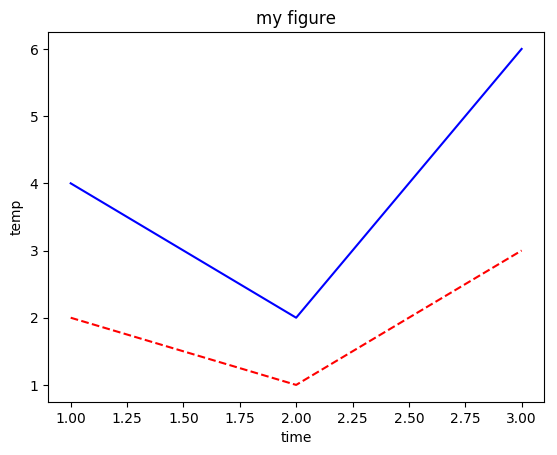

PyObject Text(24,0.5,u'temp')

In [164]:
clf() # clear figure
x = [1,2,3]
y = [2,1,3]
using PyPlot
plot(x,y,"r--")
plot(x,2*y,"b-")
title("my figure")
xlabel("time")
ylabel("temp")

* Draws a line with the values in x and in y as x- (horizontal) and y-axis (vertical) respectively. With format one can specify the color (blue ("b"), red ("r"), green ("g"), ...) and style of the line (solid (-), dots (.), dotted (:), ...)

Download these data (sea level time series in the West Florida Shelf, in the 6th column) and make a plot, with a solid line in green. The date can be derived from the 5 first columns, using the command datenum. Include labels with the variable units (meters) and the date, and add a legend.

At which date did the sea level reach its maximum? 

## Two-dimensional data (e.g. horizontal sections, ...)


```julia
pcolor(x,y,v)
```

* The value within a rectangle defined by x and y is drawn by color depending on v and on the color map. 

* show the color bar

```julia
colorbar()
```

* show color bar relating values and colors

* Missing values are unfortunatetly not directly handeld by `PyPlot'.

## Annotating your graphs


* give a title to the current figure

```julia
title("my figure")
```

* give a name to the x- and y-axis

```julia
xlabel("my label"), ylabel("my label")
```

* Save the figure as a PNG file. For a EPS file use the file extension. Do not save images in JPEG as it degrades the quality of the figure.

```julia
savefig("file.png")
```



## Loops

* Let your computer do repetitive tasks!
* Loops have a counter which takes successively all elements of a row vector

In [165]:
    for i = [1 2 10 20]
      @show i
    end

i = 1
i = 2
i = 10
i = 20


* Loops are often used with a range of values

In [166]:
for i = 1:5
  @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5


* Explicit loops can sometimes be avoided:
* For example, sum all integer from 1 to 10

In [167]:
total = 0;
for i = 1:10
   total = total + i;
end
total

55

Can simply be computed as `sum(1:10)`.

# if-statement

* Sometimes your code needs to behave differently depending on some conditions.

* if-statement has the following structure.

```julia
if some_conditions
  # do something
else
  # do something else
end
```
The else section can be omitted.

For example.

```julia
if x < 0
   x = -x;
end
```

* Which Julia function implements the last code example?

# Large data set

* DINEOF analysis of Western Mediterranean sea surface temperature.
* Download file and view content of NetCDF file with the following:

In [209]:
using NCDatasets
Dataset("WesternMedSST.nc")

Dataset: WesternMedSST.nc
Group: /

Dimensions
   lon = 327
   lat = 217
   time = 384

Variables
  lon   (327)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     standard_name        = longitude
     units                = degree_east

  lat   (217)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     standard_name        = latitude
     units                = degree_north

  time   (384)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     standard_name        = latitude
     units                = days since 1900-01-01 00:00:00

  seviri_sst   (327 × 217 × 384)
    Datatype:    Float32
    Dimensions:  lon × lat × time
    Attributes:
     standard_name        = sea_water_temperature
     long name            = sea surface temperature
     units                = degree_Celsius
     _FillValue           = -9999.0

  seviri_sst_filled   (327 × 217 × 384)
    Datatype:    Float32
    Dimensions:  lon × lat × time
    Attributes:
     standar

# Useful functions

 * display the content of a NetCDF file.
```julia
Dataset("WesternMedSST.nc")
```

 * Read a variable from a NetCDF file.
```julia
ds = Dataset("WesternMedSST.nc")
SST = ds["seviri_sst_filled"][:]
close(ds)
```

More info at https://github.com/Alexander-Barth/NCDatasets.jl

# Example

Load modules and setup some helper functions

In [210]:
using DataArrays
using NCDatasets
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# plotting with missing values (DataArrays)
pyma(S) =  pycall(ma.array, Any, S.data, mask=ismissing.(S))
PyPlot.pcolor(x,y,z::DataArray; kws...) = pcolor(x,y,pyma(z); kws...)
PyPlot.pcolor(z::DataArray; kws...) = pcolor(pyma(z); kws...)

# Helper function for dateticks
function datetick(axis,fmt = "%Y-%m-%d")
    ax = axes()
    formatter = matplotlib[:dates][:DateFormatter](fmt)

    if axis == :x
        ax[:xaxis][:set_major_formatter](formatter)
    else
        ax[:yaxis][:set_major_formatter](formatter)
    end
end



datetick (generic function with 2 methods)

In [170]:
sl  = readdlm("8762075.sealevel.txt",comment_char='%')


8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮                
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.

In [171]:
DateTime([sl[1,1:5]; 0]...) 

2004-01-01T00:00:00

In [172]:

DateTime(sl[1,1],sl[1,2],sl[1,3],sl[1,4],sl[1,5],0)

2004-01-01T00:00:00

In [173]:
[i^2 for i = 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [174]:
size(sl,1)

8784

In [175]:
t = [DateTime(sl[i,1],sl[i,2],sl[i,3],sl[i,4],sl[i,5],0) 
    for i = 1:size(sl,1)];


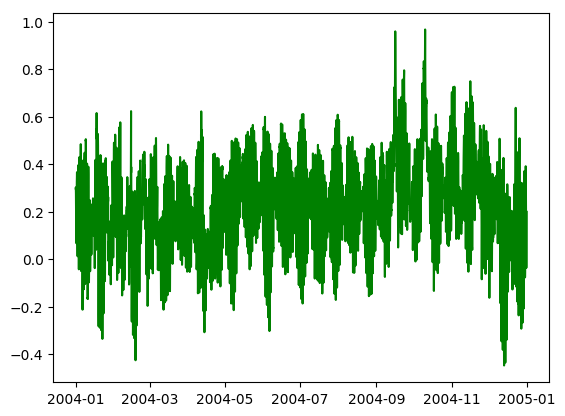

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f71bb6c90>

In [176]:
plot(t[:],sl[:,6],"g")


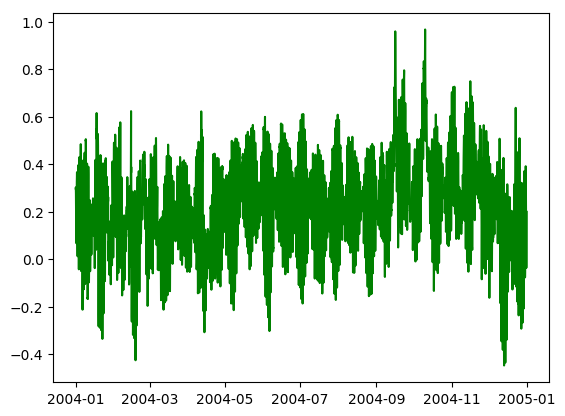

/home/abarth/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [177]:
plot(t,sl[:,6],"g")
ax = axes()
formatter = matplotlib[:dates][:DateFormatter]("%Y-%m")
locator = matplotlib[:dates][:MonthLocator](interval=2)
ax[:xaxis][:set_major_locator](locator)
ax[:xaxis][:set_major_formatter](formatter)



In [178]:
fname = "WesternMedSST.nc";
ds = Dataset(fname)
lon = ds["lon"][:].data;
lat = ds["lat"][:].data;
time = ds["time"][:].data;
SST = ds["seviri_sst"][:];
mask = ds["mask"][:].data;
close(ds)


In [179]:
time

384-element Array{DateTime,1}:
 2013-08-02T00:00:00
 2013-08-02T01:00:00
 2013-08-02T02:00:00
 2013-08-02T03:00:00
 2013-08-02T04:00:00
 2013-08-02T05:00:00
 2013-08-02T06:00:00
 2013-08-02T07:00:00
 2013-08-02T08:00:00
 2013-08-02T09:00:00
 2013-08-02T10:00:00
 2013-08-02T11:00:00
 2013-08-02T12:00:00
 ⋮                  
 2013-08-17T12:00:00
 2013-08-17T13:00:00
 2013-08-17T14:00:00
 2013-08-17T15:00:00
 2013-08-17T16:00:00
 2013-08-17T17:00:00
 2013-08-17T18:00:00
 2013-08-17T19:00:00
 2013-08-17T20:00:00
 2013-08-17T21:00:00
 2013-08-17T22:00:00
 2013-08-17T23:00:00

In [180]:
pcolor(lon,lat,tmp[:,:,1]'); colorbar()

LoadError: [91mUndefVarError: tmp not defined[39m

### Plot the first time instance of the data set with pcolor.

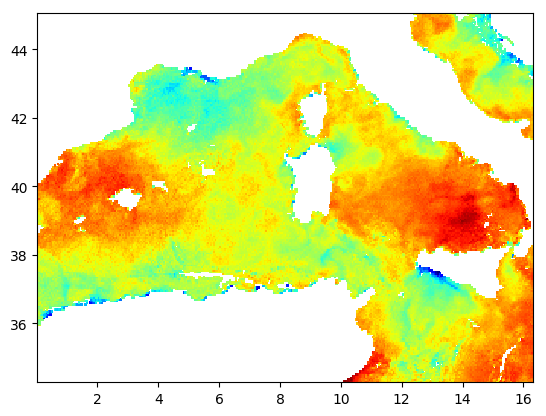

PyObject <matplotlib.collections.PolyCollection object at 0x7f5f57825190>

In [215]:
ds = Dataset("WesternMedSST.nc")
lon = ds["lon"][:]
lat = ds["lat"][:]
close(ds)

pcolor(lon,lat,SST[:,:,1]')

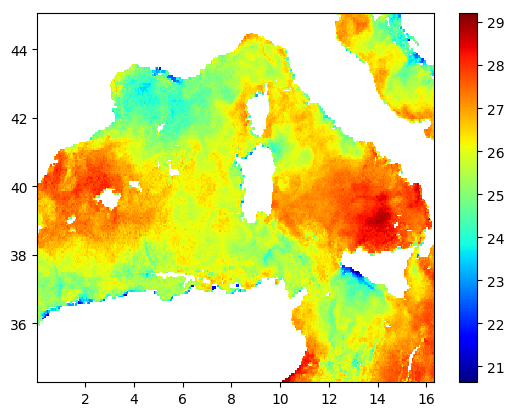

PyObject <matplotlib.colorbar.Colorbar object at 0x7f5f65b6f050>

In [181]:
pcolor(lon,lat,SST[:,:,1]');
colorbar()


In [182]:
!ismissing(SST[1,1,1])

false

### Plot the percentage of valid data grid point over time.

In [183]:
imax = size(SST,1)
jmax = size(SST,2)
kmax = size(SST,3)


384

In [184]:
imax, jmax, kmax = size(SST)

(327, 217, 384)

In [185]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [186]:
k = 1
count = 0
nbpixels = zeros(size(SST,3))

for j = 1:jmax
    for i = 1:imax
            if !ismissing(SST[i,j,k])
                count = count + 1
            end
        
    end
end
count

40845

In [187]:
sum(sum(.!ismissing.(SST[:,:,1]),1),2)

1×1 Array{Int64,2}:
 40845

In [188]:

sum(.!ismissing.(SST[:,:,1]),[1,2])

1×1 Array{Int64,2}:
 40845

In [189]:
count = zeros((imax,jmax))
for j = 1:jmax
    for i = 1:imax
        for k = 1:kmax
            if !ismissing(SST[i,j,k])
                count[i,j] = count[i,j] + 1
            end
        end

        count[i,j] = 100*count[i,j]/kmax
    end
end


In [190]:
count = 100 * squeeze(sum(.!ismissing.(SST),3),3) / kmax;


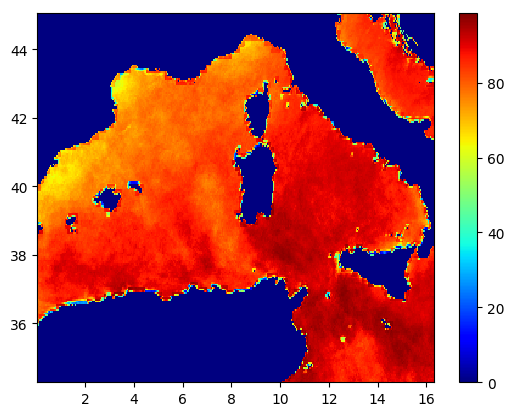

(PyObject <matplotlib.collections.PolyCollection object at 0x7f5f65b102d0>, PyObject <matplotlib.colorbar.Colorbar object at 0x7f5f637da190>)

In [191]:
pcolor(lon,lat,count'), colorbar()


### For all time instances, what is the percentage of sea grid points not covered by clouds?

In [192]:
count = zeros(Int,(kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k])
                count[k] = count[k] + 1
            end
        end
    end
end


In [193]:
count[1:4]

4-element Array{Int64,1}:
 40845
 40545
 40491
 40515

In [194]:
count = squeeze(sum(sum(.!ismissing.(SST),1),2),(1,2))
count[1:4]

4-element Array{Int64,1}:
 40845
 40545
 40491
 40515

In [195]:
percentage = 100 * count / sum(mask)
percentage[1:10]

10-element Array{Float64,1}:
 98.2347
 97.5132
 97.3833
 97.441 
 97.6406
 96.4598
 90.7501
 90.7285
 91.159 
 92.0104

In [196]:
time[1:5]

5-element Array{DateTime,1}:
 2013-08-02T00:00:00
 2013-08-02T01:00:00
 2013-08-02T02:00:00
 2013-08-02T03:00:00
 2013-08-02T04:00:00

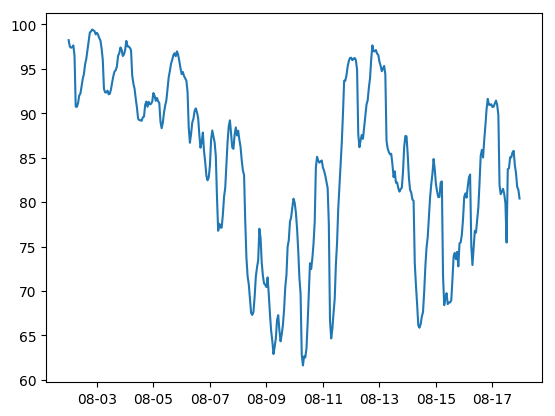

In [197]:
plot(time,percentage)
datetick(:x,"%m-%d")


### Plot the time average of SST

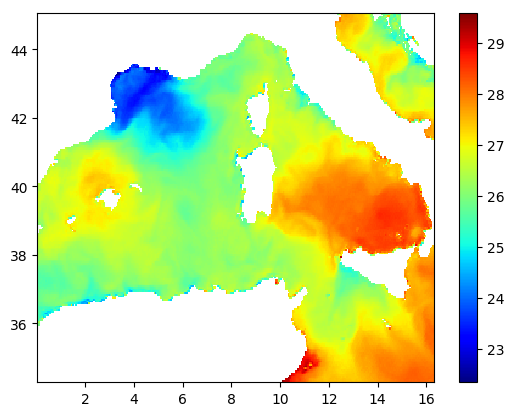

PyObject <matplotlib.colorbar.Colorbar object at 0x7f5f5ba59590>

In [198]:
SST2 = copy(SST.data);
SST2[ismissing.(SST)] = 0;
count = sum(.!ismissing.(SST),3)
meanSST = DataArray(sum(SST2,3) ./ count,count .== 0);


pcolor(lon,lat,meanSST[:,:,1]');   colorbar()


### Plot the space average of SST 

* assuming that all pixels have the same area

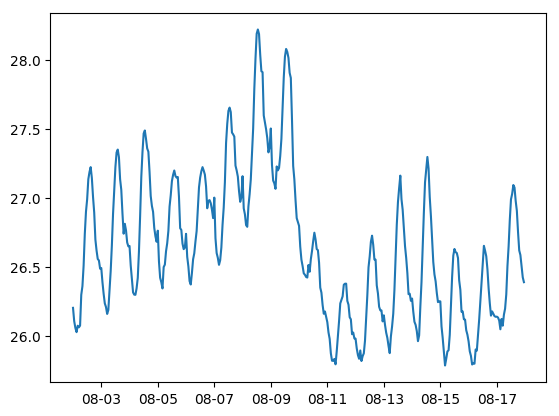

In [199]:
meanSSTt = sum(sum(SST2,1),2) ./ sum(sum(.!ismissing.(SST),1),2);
meanSSTt = squeeze(meanSSTt,(1,2));
plot(time,meanSSTt)
datetick(:x,"%m-%d")


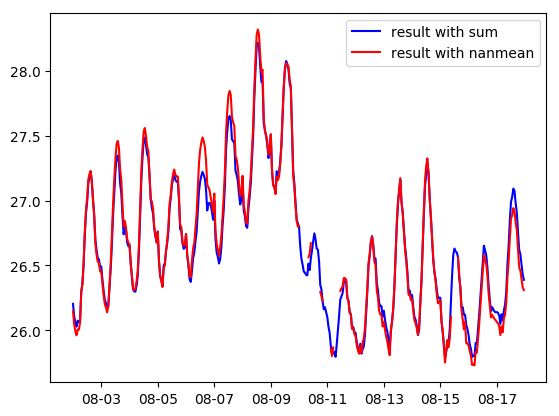

In [200]:
meanSSTt2 = mean(mean(SST,1,skipna=true),2,skipna=true)
meanSSTt2 = squeeze(meanSSTt2,(1,2));
plot(time,meanSSTt,"b")
plot(time,meanSSTt2,"r")
legend(["result with sum","result with nanmean"]);
datetick(:x,"%m-%d")


### Make a time serie with the number of pixels with the temperature larger than 25 degree Celsius.

In [201]:
count = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k]) && (SST[i,j,k] > 25)
                count[k] = count[k] + 1
            end
        end
    end
end


In [202]:
count[1:5]

5-element Array{Float64,1}:
 36399.0
 35338.0
 34948.0
 34721.0
 34993.0

In [203]:
count = sum(SST .> 25,[1,2],skipmissing = true)
count = squeeze(count,(1,2))


384-element Base.ReshapedArray{Union{Int64, Missings.Missing},1,DataArrays.DataArray{Int64,3},Tuple{}}:
 36399
 35338
 34948
 34721
 34993
 34571
 32890
 34199
 34709
 35922
 36852
 37733
 38252
     ⋮
 29782
 33148
 33511
 34151
 34028
 34405
 34172
 33039
 32525
 31858
 31410
 30630

In [204]:
count[1:5]

5-element DataArrays.DataArray{Int64,1}:
 36399
 35338
 34948
 34721
 34993

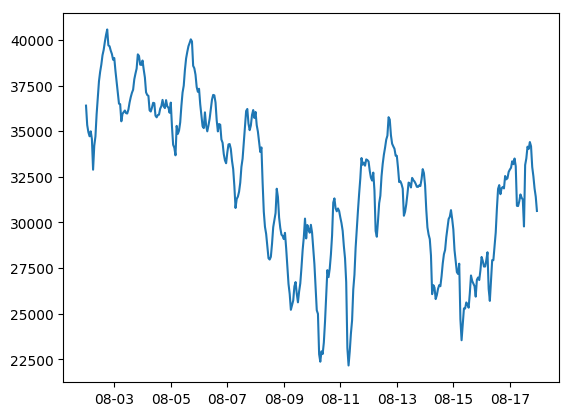

In [205]:
plot(time,count)
datetick(:x,"%m-%d")


### Make a time serie of the area (in km2) with the temperature larger than 25 degree Celsius

In [206]:
# Earth Radius (in km)
R = 6371;
# surface of each cell
dx = pi * 0.05 * R/180;
dy = pi * 0.05 * R/180 * cos.(pi*lat/180);


In [207]:
area = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k]) && (SST[i,j,k] > 25)
                area[k] = area[k] + dx * dy[j]
            end
        end
    end
end


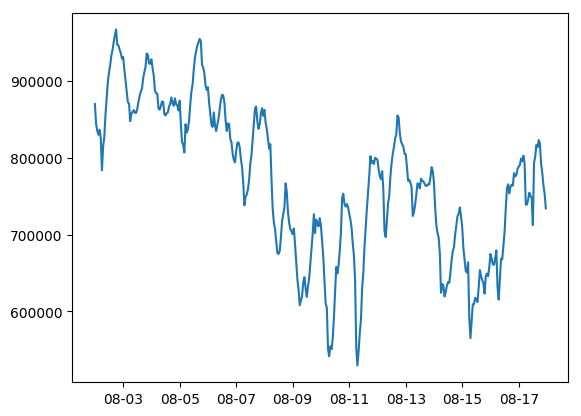

In [208]:
plot(time,area)
datetick(:x,"%m-%d")
